In [1]:
from my_library.algorithms.hierarchical import hierarchical as hier

In [2]:
hi=hier.Hierarchical('csv_hcb_member_profiling_preprocessed.csv')

In [3]:
hi.get_shape()

(10000, 55)

In [4]:
folds = 5
params_grid = {"linkage": ["ward", "complete", "average", "single"],
               "n_clusters": list(range(2, 10)),
               "affinity": ["euclidean", "l1", "l2", "manhattan", "cosine"]}

In [5]:
a, b, c = hi.randomizedSearchCV_hierarchical(params_grid, folds)

In [6]:
linkage = b['linkage']
n_clusters = b['n_clusters']
affinity = b['affinity']

In [7]:
print("recommended parameters: ", linkage, n_clusters, affinity)

recommended parameters:  complete 3 l2


In [9]:
hi.get_training_history(c)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_clusters,param_linkage,param_affinity,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003275,0.000697,0.000000,0.000000,5,ward,manhattan,"{'n_clusters': 5, 'linkage': 'ward', 'affinity...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
1,0.075965,0.002065,0.010991,0.000550,5,average,l2,"{'n_clusters': 5, 'linkage': 'average', 'affin...",0.527579,0.575164,0.508858,0.569739,0.586762,0.553620,0.030014,2
2,0.055255,0.001589,0.009304,0.000399,4,single,manhattan,"{'n_clusters': 4, 'linkage': 'single', 'affini...",0.499885,0.212603,0.364432,0.380106,0.375445,0.366494,0.091373,5
3,0.077048,0.001514,0.010369,0.000313,6,ward,euclidean,"{'n_clusters': 6, 'linkage': 'ward', 'affinity...",0.516011,0.542068,0.522971,0.542885,0.565647,0.537916,0.017402,3
4,0.069705,0.001055,0.009447,0.000518,3,average,cosine,"{'n_clusters': 3, 'linkage': 'average', 'affin...",0.141959,0.178588,0.208211,0.187519,0.124013,0.168058,0.030734,7
5,0.062179,0.006327,0.011349,0.001831,4,single,l2,"{'n_clusters': 4, 'linkage': 'single', 'affini...",0.510025,0.188870,0.282082,0.380106,0.395605,0.351338,0.108776,6
6,0.103941,0.029125,0.012640,0.002908,2,complete,cosine,"{'n_clusters': 2, 'linkage': 'complete', 'affi...",0.135467,0.190575,0.205690,0.181616,0.126222,0.167914,0.031366,8
7,0.121977,0.073445,0.011004,0.000963,5,complete,l1,"{'n_clusters': 5, 'linkage': 'complete', 'affi...",0.517900,0.527361,0.533752,0.499132,0.551055,0.525840,0.017188,4
8,0.056488,0.007781,0.009996,0.000865,3,single,cosine,"{'n_clusters': 3, 'linkage': 'single', 'affini...",0.137835,0.178588,0.208211,0.187519,0.124013,0.167233,0.031470,9
9,0.073577,0.000925,0.009985,0.000338,3,complete,l2,"{'n_clusters': 3, 'linkage': 'complete', 'affi...",0.598113,0.557854,0.580135,0.565467,0.580434,0.576401,0.013894,1


In [10]:
clusters, data = hi.hierarchical(n_clusters, linkage, affinity)

In [11]:
clusters = hi.knn(data, clusters)

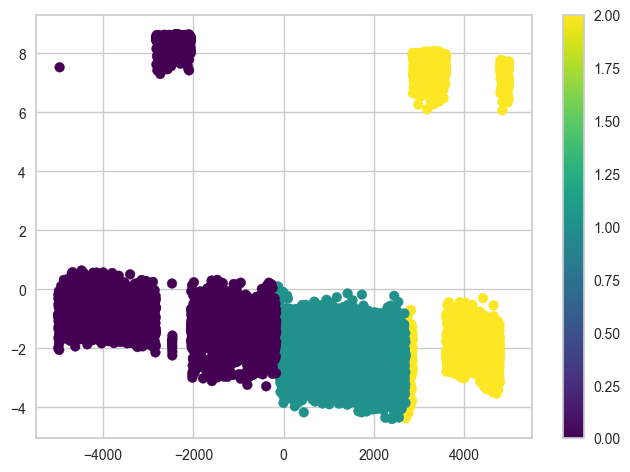

In [12]:
hi.scatter_plot(hi.pca(clusters))

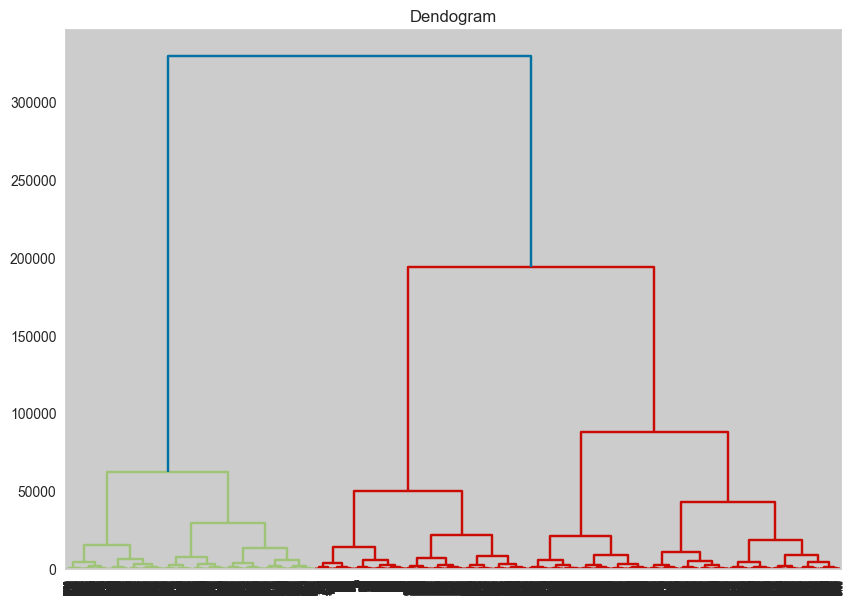

In [13]:
hi.dendogram()

In [14]:
hi.get_silhouette_score(clusters)

0.5541158288289638

In [15]:
hi.get_davies_bouldin_score(clusters)

0.5000792754022189

In [16]:
hi.get_cluster_centers(clusters)

,Unnamed: 0,spclty_visit_cnt_processed,ucc_mcable_visit_count_processed,srv_copay_amt_processed,aetna_num_children_modif_processed,strat_score_value_processed,ucc_visit_cnt_processed,first_pulse_processed,pcp_visit_cnt_processed,age_nbr_processed,op_rehab_visit_cnt_processed,final_future_tenure_processed,hosop_lab_visit_cnt_processed,income_processed,hosop_rad_visit_cnt_processed,op_rehab_allowed_amt_processed,final_total_tenure_processed,medical_allowed_pmpm_processed,rx_mths_processed,complex_chronic_common_flag_processed,relationship_processed,active_medical_ind_ind,hyc_missing_ind,hyc_ind,a2020_rx_ind_ind,cvs_rx_inrange_ind_ind,marital_ind,ctd_missing_ind,dep_missing_ind,alg_missing_ind,active_dental_ind_ind,cvs_mc_inrange_ind_ind,a2020_medicare_ind_ind,high_pulse_missing_ind,high_pulse_ind,active_pharmacy_ind_ind,active_medicare_ind_ind,hyp_missing_ind,hyp_ind,cvs_hh_inrange_ind_ind,dia_missing_ind,a2020_dental_ind_ind,lbp_missing_ind,obe_missing_ind,anx_missing_ind,ngd_missing_ind,ngd_ind,pcp_flag_ind,gender_cd_ind,urbsubr_R,urbsubr_S,urbsubr_U,lob_CFI,lob_CSI,lob_ME,cluster
0,7580.5,-0.234100,0.065844,-0.194869,0.342053,-0.553685,0.055467,-0.516163,-0.184506,-0.635447,0.089236,-0.094009,-0.181342,-0.036749,-0.200749,0.144328,-0.128796,-0.170741,-0.072744,0.437216,-0.592096,0.007325,-0.033460,-0.491962,-0.071986,-0.045274,0.032627,-0.033460,-0.033460,-0.033460,0.067338,0.054250,-0.305824,-0.033460,-0.293825,-0.168062,-0.288836,-0.033460,-0.507387,-0.062775,-0.033460,-0.005687,-0.033460,-0.033460,-0.033460,-0.033460,-0.238415,0.159051,0.058273,-0.043787,-0.011863,0.055900,0.002478,0.246047,-0.306201,0
1,3728.0,0.362081,-0.107555,0.374863,-0.535211,0.721523,-0.112616,0.702958,0.382156,0.826168,-0.080640,0.212872,0.308991,-0.105485,0.313215,-0.136841,0.190502,0.236961,0.249882,-0.251796,-0.071237,-0.078587,-0.453371,0.916231,0.248399,-0.341555,0.169666,-0.453371,-0.453371,-0.453371,-0.109240,0.118638,0.789960,-0.453371,0.380267,0.451458,0.728018,-0.453371,0.935186,-0.162446,-0.453371,0.102369,-0.453371,-0.453371,-0.453371,-0.453371,0.454300,-0.496181,0.011254,0.072701,-0.006936,-0.068651,-0.094750,-0.570827,0.790447,1
2,1147.0,0.041172,-0.004441,-0.057498,-0.052464,0.265847,0.023756,0.209942,-0.088453,0.307481,-0.087376,-0.067751,-0.003724,0.209245,0.031912,-0.133307,0.033528,0.063912,-0.158814,-0.607124,1.337166,0.082733,0.636905,-0.107504,-0.158559,0.522123,-0.280732,0.636905,0.636905,0.636905,-0.005487,-0.262568,-0.342151,0.636905,0.144358,-0.209694,-0.300583,0.636905,-0.098666,0.335267,0.636905,-0.115894,0.636905,0.636905,0.636905,0.636905,-0.064935,0.284559,-0.136902,0.001485,0.033672,-0.032080,0.113142,0.194416,-0.341965,2


In [17]:
hi.get_cluster_distribution(clusters)

,cluster,count,percentage
0,0,4838,48.38
1,1,2867,28.67
2,2,2295,22.95


In [18]:
hi.get_scores(clusters)

,silhouette_score,davies_bouldin_score
0,0.554116,0.500079
